# BCG X Challenge - Amigos do Bem

Transformando o sertão com dados!

O Amigos do Bem é uma organização sem fins lucrativos que atua há 30 anos no sertão nordestino, transformando vidas por meio de ações de educação, saúde, trabalho e renda. A organização atende mais de 150 mil pessoas em 300 povoados, localizadas em 3 estados do Nordeste: Alagoas, Ceará e Pernambuco.

Assim, viu-se a necessidade de criar um padrão de avaliação de impacto social, que permitisse a comparação entre os povoados atendidos pela organização. Para isso, foi criado o Índice de Desenvolvimento Humano Sertão (IDHSertão), que é composto por 3 dimensões: educação, saúde e renda. Cada dimensão é composta por 3 indicadores, que por sua vez são compostos por 3 variáveis. O IDHSertão é calculado a partir da média ponderada dos indicadores, que são calculados a partir da média ponderada das variáveis.


Grupo 14

Integrantes:
- Marcos Vinícius Moura
- Priscila Falcão
- Raphael Lisboa Antunes
- Thomas Barton

### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Tratamento das bases de dados

In [2]:
# Importando dados dos municípios do semiárido
municipios = pd.read_excel("Dados/Municipios/lista-1262municipios-semiarido-2017.xlsx")
municipios = municipios.rename(columns=municipios.iloc[1])
municipios = municipios.drop([0, 1]).reset_index(drop=True)
municipios = municipios.drop('#', axis=1).reset_index(drop=True)

In [3]:
municipios_todos = pd.read_csv("Dados/Municipios/municipios.csv")
municipios_todos = municipios_todos[(municipios_todos['codigo_ibge'].isin(municipios['Cod IBGE']))]

In [32]:
censo

,ANO,UF,Codmun6,Codmun7,Município,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,...,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
464,1991,21,210090,2100907,ARAIOSES,53.99,6.28,104.60,134.32,109.23,...,NaN,NaN,33213,33057,0.039,0.044,0.199,0.042,0.483,0.387
652,1991,21,211220,2112209,TIMON,60.57,4.21,67.16,87.28,86.32,...,NaN,NaN,106768,106177,0.198,0.157,0.362,0.170,0.593,0.470
666,1991,22,220005,2200053,ACAUÃ,53.44,6.36,100.47,129.09,87.46,...,NaN,NaN,5667,5623,0.016,0.019,0.143,0.018,0.474,0.344
669,1991,22,220025,2200251,ALAGOINHA DO PIAUÍ,58.59,3.87,72.33,94.45,74.05,...,NaN,NaN,8045,7879,0.033,0.060,0.226,0.049,0.560,0.420
670,1991,22,220027,2200277,ALEGRETE DO PIAUÍ,56.07,4.32,85.41,110.69,80.52,...,NaN,NaN,4210,4183,0.044,0.118,0.265,0.085,0.518,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14205,2010,31,317065,3170651,Vargem Grande do Rio Pardo,73.63,1.64,17.50,20.38,53.27,...,349.0,3070.0,4733,4615,0.345,0.711,0.634,0.559,0.811,0.563
14208,2010,31,317080,3170800,Várzea da Palma,73.83,2.09,17.20,19.99,46.19,...,2110.0,24527.0,35740,35466,0.420,0.669,0.666,0.573,0.814,0.634
14209,2010,31,317090,3170909,Varzelândia,73.37,2.55,18.00,20.88,62.84,...,1405.0,11801.0,19056,18592,0.282,0.620,0.594,0.477,0.806,0.546
14211,2010,31,317103,3171030,Verdelândia,72.81,3.13,18.90,22.00,64.32,...,666.0,4805.0,8294,8131,0.266,0.608,0.584,0.462,0.797,0.542


In [5]:
censo = pd.read_csv("Dados/Censo/Censo_municipal_estadual_nacional-MUN91-00-10.csv")
censo = censo[(censo['Codmun7'].isin(municipios['Cod IBGE']))]
censo_siglas = pd.read_csv("Dados/Censo/Censo_municipal_estadual_nacional-Siglas.csv")

In [6]:
# Dados pegos do site oficial do IBGE por estado, tratados e concatenados em um único csv

dados_ibge = pd.read_csv("Dados/Dados IBGE/Dados IBGE.csv")
dados_ibge = dados_ibge[(dados_ibge['Munic&iacute;pio [-]'].isin(municipios['Cod IBGE']))]

In [7]:
idh_tot_to_merge = idh_tot.drop_duplicates(subset='IBGE7', keep='last').reset_index(drop=True)
censo_to_merge = censo.drop_duplicates(subset='Codmun7', keep='last').reset_index(drop=True)
censo_idh_merged = pd.merge(idh_tot_to_merge[['IBGE7', 'NOME', 'POP_TOT']], censo_to_merge[['Codmun7', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']], left_on='IBGE7', right_on='Codmun7', how='inner')
df = censo_idh_merged.drop('Codmun7', axis=1)

In [8]:
df = pd.merge(df, municipios[['Cod IBGE', 'UF']], left_on='IBGE7', right_on='Cod IBGE', how='inner')
df = pd.merge(df, municipios_todos[['codigo_ibge', 'latitude', 'longitude']], left_on='IBGE7', right_on='codigo_ibge', how='inner')
df = df.drop(['Cod IBGE', 'codigo_ibge'], axis=1)
df = df.sort_values(by='IBGE7')

In [9]:
dados_ibge = dados_ibge.sort_values(by='Munic&iacute;pio [-]').reset_index(drop=True)
df['AREA_KM²'] = dados_ibge['Prefeito [2021]']
df['POP/KM²'] = dados_ibge['Popula&ccedil;&atilde;o residente - pessoas [2022]']

In [10]:
censo_siglas[(censo_siglas['SIGLA'].isin(['PIA18M']))] # Linha de código para pegar informação de siglas que não soubermos durante o período de desenvolvimento

,SIGLA,NOME CURTO,NOME LONGO,DEFINIÇÃO
228,PIA18M,População de 18 anos ou mais,População de 18 anos ou mais em idade ativa,População residente nessa faixa etária


In [11]:
# Municípios que já tem a ajuda do Amigos do Bem ordenados por IDHM

df[(df['IBGE7'].isin([2602803, 2607000, 2308104, 2708402]))].sort_values(by=['IDHM'])

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,UF,latitude,longitude,AREA_KM²,POP/KM²
753,2607000,Inajá,22801,0.523,0.400,0.711,0.503,PE,-8.90206,-37.8351,1231.362,20.79
722,2602803,Buíque,57696,0.527,0.395,0.746,0.497,PE,-8.61954,-37.1606,1336.544,38.98
861,2708402,São José da Tapera,32626,0.527,0.409,0.703,0.508,AL,-9.55768,-37.3831,490.879,62.35
290,2308104,Mauriti,46548,0.605,0.526,0.772,0.544,CE,-7.38597,-38.7708,1079.011,42.22


In [75]:
# Municípios com IDHM menor ou igual a 0.5 ordenados (média do sertão é 0.55)

df[df['IDHM'] <= 0.499].sort_values(by='IDHM')

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,UF,latitude,longitude,AREA_KM²,POP/KM²
840,2703304,Inhapi,18652,0.484,0.316,0.718,0.501,AL,-9.22594,-37.7509,372.019,40.77
151,2209658,São Francisco de Assis do Piauí,5657,0.485,0.336,0.734,0.462,PI,-8.23599,-41.6873,1072.311,5.20
1016,2916500,Itapicuru,36211,0.486,0.319,0.711,0.505,BA,-11.30880,-38.2262,1557.685,20.34
769,2609154,Manari,21047,0.487,0.354,0.682,0.477,PE,-8.96490,-37.6313,344.685,68.94
49,2202653,Caxingó,5330,0.488,0.329,0.708,0.498,PI,-3.41904,-41.8955,491.093,11.19
23,2201739,Betânia do Piauí,6106,0.489,0.342,0.702,0.486,PI,-8.14376,-40.7989,579.576,10.73
851,2706000,Olivença,11772,0.493,0.345,0.677,0.513,AL,-9.51954,-37.1954,175.288,61.68
50,2202703,Cocal,27338,0.497,0.334,0.712,0.516,PI,-3.47279,-41.5546,1294.133,21.80
52,2202729,Cocal dos Alves,6054,0.498,0.315,0.779,0.504,PI,-3.62047,-41.4402,324.856,19.66
14,2201051,Assunção do Piauí,7717,0.499,0.382,0.706,0.462,PI,-5.86500,-41.0389,1690.703,4.41


In [74]:
# Municípios com população maior ou igual a 15000 (o menor valor de população nas cidades já ajudadas pelos Amigos do Bem é de 18000) e IDHM menor ou igual a 0.5 ordenados (média do sertão é 0.55)

df[(df['POP_TOT'] >= 6000) & (df['IDHM'] < 0.5)].sort_values(by='IDHM')

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,UF,latitude,longitude,AREA_KM²,POP/KM²
840,2703304,Inhapi,18652,0.484,0.316,0.718,0.501,AL,-9.22594,-37.7509,372.019,40.77
1016,2916500,Itapicuru,36211,0.486,0.319,0.711,0.505,BA,-11.30880,-38.2262,1557.685,20.34
769,2609154,Manari,21047,0.487,0.354,0.682,0.477,PE,-8.96490,-37.6313,344.685,68.94
23,2201739,Betânia do Piauí,6106,0.489,0.342,0.702,0.486,PI,-8.14376,-40.7989,579.576,10.73
851,2706000,Olivença,11772,0.493,0.345,0.677,0.513,AL,-9.51954,-37.1954,175.288,61.68
50,2202703,Cocal,27338,0.497,0.334,0.712,0.516,PI,-3.47279,-41.5546,1294.133,21.80
52,2202729,Cocal dos Alves,6054,0.498,0.315,0.779,0.504,PI,-3.62047,-41.4402,324.856,19.66
14,2201051,Assunção do Piauí,7717,0.499,0.382,0.706,0.462,PI,-5.86500,-41.0389,1690.703,4.41


### Análise exploratória dos dados

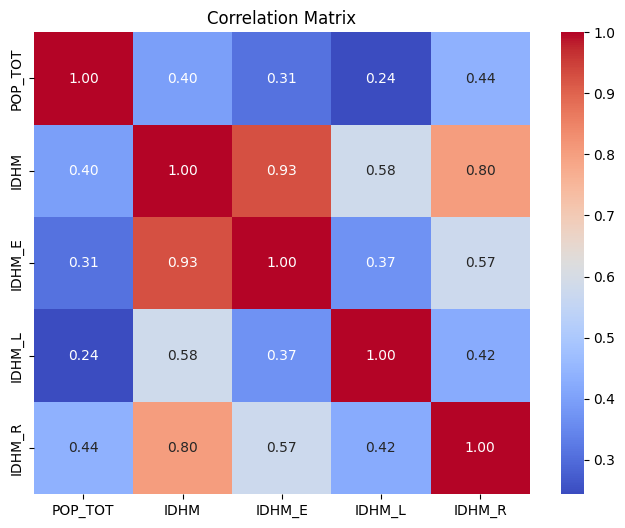

In [14]:
# Correlação dos dados de IDH dos municípios

correlation_df = df.copy()
correlation_df = correlation_df.drop(['IBGE7', 'NOME', 'UF', 'latitude', 'longitude', 'AREA_KM²', 'POP/KM²'], axis=1)
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

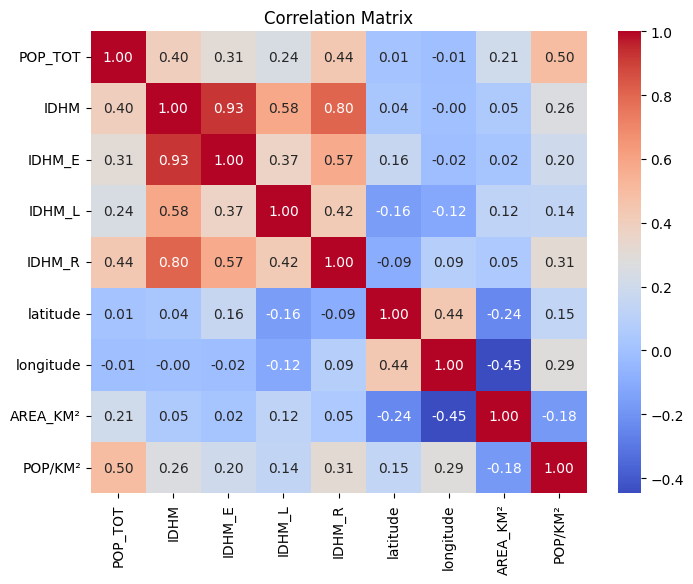

In [15]:
# Correlação de todos os dados do dataframe tratado

correlation_df = df.copy()
correlation_df = correlation_df.drop(['IBGE7', 'NOME', 'UF'], axis=1)
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0, 0.5, 'IDHM_E')

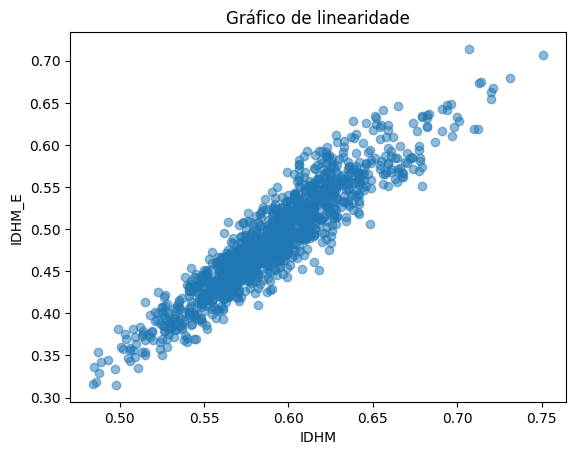

In [16]:
# Gráfico mostrando a linearidade entre os valores de IDHM e IDHM_E

x = df['IDHM']
y = df['IDHM_E']

df[(df['POP_TOT'] >= 15000) & (df['IDHM'] < 0.52)]['IDHM']

plt.scatter(x, y, alpha=0.5)
plt.title('Gráfico de linearidade')
plt.xlabel('IDHM')
plt.ylabel('IDHM_E')

### Análise dos custos

In [17]:
final_towns = df[(df['POP_TOT'] >= 15000) & (df['IDHM'] < 0.52)].copy().reset_index(drop=True)

In [18]:
transporte = pd.read_csv("Dados/Transportes/transport_cost.csv")
transporte = transporte[(transporte['codigo_ibge'].isin(final_towns['IBGE7']))]
min_cost_indices = transporte.groupby('codigo_ibge')['transportation_cost'].idxmin()
transporte = transporte.loc[min_cost_indices].sort_values(by=['codigo_ibge'])
final_towns['CUSTO_TRANSPORTE'] = transporte['transportation_cost'].reset_index(drop=True)

In [19]:
# Análise dos custos de transporte dos municípios filtrados

final_towns.sort_values(by='CUSTO_TRANSPORTE')

,IBGE7,NOME,POP_TOT,IDHM,IDHM_E,IDHM_L,IDHM_R,UF,latitude,longitude,AREA_KM²,POP/KM²,CUSTO_TRANSPORTE
8,2916500,Itapicuru,36211,0.486,0.319,0.711,0.505,BA,-11.30880,-38.2262,1557.685,20.34,23766.05503
12,2926509,Ribeira do Amparo,15443,0.512,0.384,0.694,0.503,BA,-11.04210,-38.4242,644.229,21.48,23986.17667
10,2924207,Pedro Alexandre,18209,0.513,0.354,0.778,0.489,BA,-10.01200,-37.8932,889.572,15.69,24348.88519
2,2608404,Jurema,15284,0.509,0.372,0.681,0.522,PE,-8.70714,-36.1347,148.254,92.06,24446.52253
9,2921500,Monte Santo,51953,0.506,0.359,0.699,0.515,BA,-10.43740,-39.3321,3034.197,15.75,24661.74527
6,2703304,Inhapi,18652,0.484,0.316,0.718,0.501,AL,-9.22594,-37.7509,372.019,40.77,24731.10036
5,2701605,Canapi,17983,0.506,0.357,0.719,0.504,AL,-9.11932,-37.5967,602.778,25.81,24734.22180
1,2607505,Itaíba,26314,0.510,0.364,0.688,0.531,PE,-8.94569,-37.4173,1061.694,30.75,24766.12422
7,2705002,Mata Grande,25589,0.504,0.369,0.685,0.506,AL,-9.11824,-37.7323,914.722,23.88,24784.14603
3,2609154,Manari,21047,0.487,0.354,0.682,0.477,PE,-8.96490,-37.6313,344.685,68.94,24832.77179


In [66]:
# Análise de possíveis exportações nos municípios filtrados

exportacao = pd.read_csv("Dados/COMEX/EXP_2022_MUN.csv", sep = ';')

In [34]:
exp_sem = exportacao[exportacao['SG_UF_MUN'].isin(final_towns['UF'])]

In [68]:
exp_sem[(exp_sem['VL_FOB'] > exp_sem['KG_LIQUIDO']) & (exp_sem['SG_UF_MUN'] == 'PI')].sort_values(['SG_UF_MUN', 'VL_FOB'])

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB
260593,2022,12,3923,249,PI,2207009,0,1
14110,2022,12,3924,149,PI,2211001,0,3
365462,2022,12,3924,607,PI,2211001,0,3
980997,2022,10,3924,628,PI,2211001,0,3
174005,2022,1,3307,573,PI,2211001,1,4
...,...,...,...,...,...,...,...,...
142140,2022,5,2939,767,PI,2207702,386,1317250
1038423,2022,8,409,249,PI,2207009,398450,1533177
375066,2022,11,409,249,PI,2207009,416020,1570797
987480,2022,6,409,249,PI,2207009,440490,1627366


In [49]:
exp_leg = pd.read_csv("Dados/COMEX/sh4_agropecuaria.csv", sep = ',')

In [70]:
exp_leg[exp_leg['Código SH4'].isin([2932])]

,Código SH4,Descrição do produto exportado,Denominação nesse estudo


In [54]:
exp_leg

,Código SH4,Descrição do produto exportado,Denominação nesse estudo
0,5201,"Algodão, não cardado nem penteado.",Algodão
1,5203,Algodão cardado ou penteado.,Algodão
2,1404,Produtos vegetais não especificados nem compre...,Coprodutos do Algodão
3,5204,"Linhas para costurar, de algodão, mesmo acondi...",Coprodutos do Algodão
4,5205,"Fios de algodão (exceto linhas para costurar),...",Coprodutos do Algodão
...,...,...,...
63,1108,Amidos e féculas.,Farelo/Farinha e Resíduos Sólidos
64,1005,Milho,Milho/Soja em Grãos
65,1102,"Farinhas de cereais, exceto de trigo ou de mis...",Farelo/Farinha e Resíduos Sólidos
66,1103,"Grumos, sêmolas e pellets de cereais.",Farelo/Farinha e Resíduos Sólidos
